### 1 Previous Story
- 일반적인 문제해결 절차
    - Study the problem / Write rules / Evaluate -> good or bad
    - good : Launch/ bad : Analyze errors >> Study the problem
- 만약 데이터를 기반으로 한다면
    - Study the problem/ Train ML algorithm/ Evaluate solution -> good or bad
    - good: Launch/ bad: Analyze errors >> Study the problem
- 모델 스스로 데이터를 기반으로 변화에 대응 할수 있음
- 심지어 머신러닝을 통해 우리가 배울 수도 있다
- 지도 학습
    - 분류 Classification
    - 회귀 Regression
- 비지도 학습: 레이블이 없다.
    - 군집
    - 차원 축소

### 2 Regression
- 만약 주택의 넓이와 가격이라는 데이터가 있고 주택 가격을 예측한다면
- 머신러닝 모델 만들기
    - 가설(Hypothesis)을 어떻게 세우면 좋을까?
- 만약 1차함수 라면? 선형 회귀
    - 입력 변수(특징) x가 하나인 경우, 선형회귀 문제는 주어진 학습데이터와 가장 잘맞는 h함수를 찾는 문제가 됨
- 모델을 구성하는 파라미터를 어떻게 찾을까?
    - OLS : Ordinary Linear Least Square, 최소 자승법

#### 3.21 OLS 내용 실습

#### 3.23 데이터 만들고

In [2]:
import pandas as pd

data = {'x': [1., 2., 3., 4.,  5.], 'y':[1., 3., 4., 6., 5.]}
df = pd.DataFrame(data)
df

,x,y
0,1.0,1.0
1,2.0,3.0
2,3.0,4.0
3,4.0,6.0
4,5.0,5.0


#### 3.24 가설을 세워주고

In [3]:
import statsmodels.formula.api as smf

lm_model = smf.ols(formula='y ~ x', data=df).fit()
# fomula = 내가 넣을 데이터의 features
# <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x20e2d1629d0>

#### 3.25 결과

In [5]:
lm_model.params

Intercept    0.5
x            1.1
dtype: float64

#### 3.26 seaborn을 import하고

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### 3.27 seaborn을 이용해서 plot

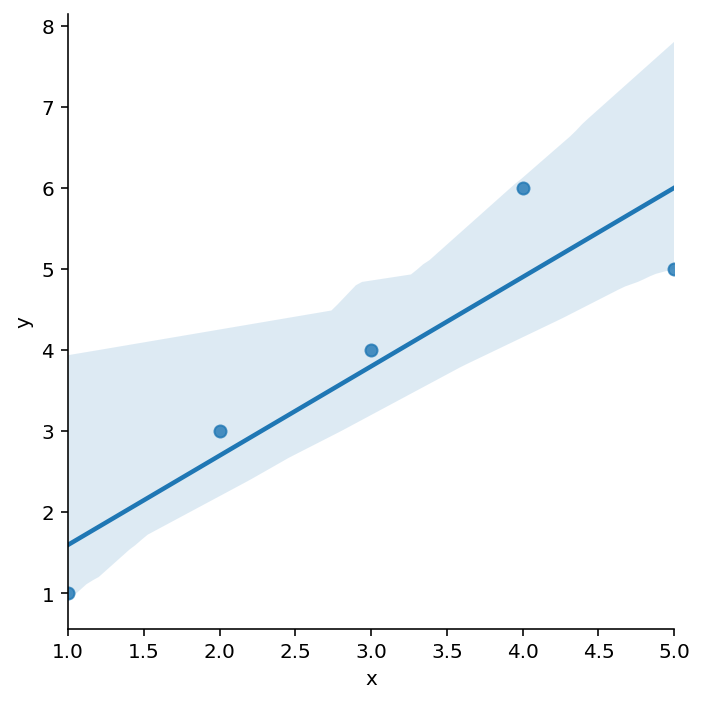

In [7]:
sns.lmplot(x='x', y='y', data=df)

#### 3.28 잔차 평가 residue
- 잔차는 평균이 0인 정규분포를 따르는 것이어야 함
- 잔차 평가는 잔차의 평균이 0이고 정규 분포를 따르는지 확인

#### 3.29 잔차 확인

In [10]:
resid = lm_model.resid
resid

0   -0.6
1    0.3
2    0.2
3    1.1
4   -1.0
dtype: float64

#### 3.30 결정계수
- y_hat은 예측된 값
- 예측 값과 실제 값이 일치하면 결정계수는 1이됨
- 즉, 결정계수가 높을 수록 좋은 모델

#### 3.31 numpy로 직접 결정계수 계산

In [13]:
df

,x,y
0,1.0,1.0
1,2.0,3.0
2,3.0,4.0
3,4.0,6.0
4,5.0,5.0


In [11]:
import numpy as np

mu = np.mean(df.y) # y 값 평균
y = df.y # 실제 y 값
yhat = lm_model.predict() # 모델을 돌려 나온 예측값
np.sum((yhat - mu)**2 / np.sum((y - mu)**2)) # 결정계수 계산 식

0.8175675675675673

#### 3.32 결정계수 한줄로 구현

In [15]:
lm_model.rsquared

0.8175675675675677

#### 3.33 잔차의 분포도 확인

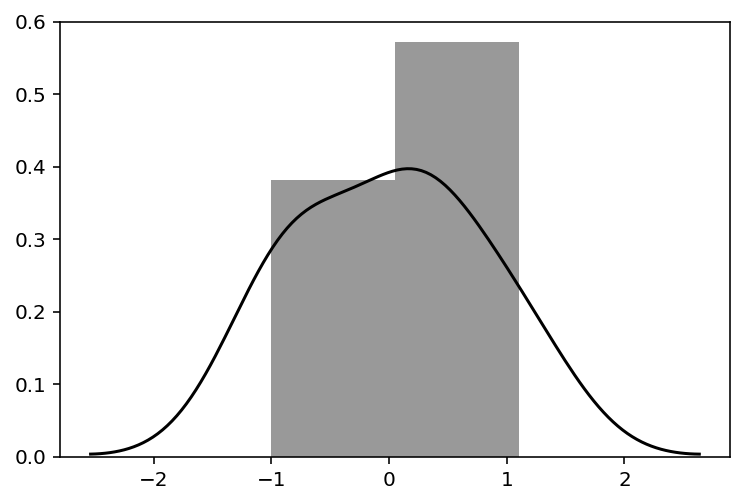

In [17]:
sns.distplot(resid, color='black')